In [2]:
import csv
import numpy as np
import os
import pandas as pd

In [11]:
newsdata = pd.read_csv('news.csv') 
print(newsdata.shape)

(3566, 7)


In [12]:
newsdata

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...
...,...,...,...,...,...,...,...
3561,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,2015-12-23 09:07:00,South Korea on Wednesday declared a formal end...,South Korea on Wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...
3562,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,2014-01-28 16:07:00,The spread of MERS coronavirus infections in h...,The spread of MERS coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...
3563,4606,['Cbc News'],Ellershausen Manor is for sale,2012-11-02 01:24:00,A clasic old home with a lot of history in now...,"It's a relic of a bygone era, when wealthy Nov...",https://www.cbc.ca/news/canada/nova-scotia/ell...
3564,4607,['Cbc News'],MERS virus from camels and humans called indis...,2014-04-29 16:57:00,Camels have been implicated in a Middle Easter...,Camels have been implicated in a Middle Easter...,https://www.cbc.ca/news/health/mers-virus-from...


In [4]:
con = pd.read_csv('news.csv',usecols=['text'])

In [5]:
record_num = int(con.describe().iloc[0,0])

xixi = []

for i in range(record_num):
    xixi.append(con.iloc[i,0])
    

#xixi

In [6]:
des = open('description1.txt','w',encoding='utf-8')
for i in xixi:
    des.write(i)
    des.write('\n')
des.close()

In [7]:
che = list("\t\().,?[]!;|@") + ['--']

In [8]:
def ReplaceSplit(s):
    for c in che:
        s = s.replace(c, " ")
        
    return s.split()

        

In [9]:
hehe = ["i", "me",'would',"don't", 'U',"my", "myself", "we", "our","A" ,"In","know","ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am",'get','But','per', 'S',"is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so","said",'"','—','also','says','two','I',"it's",'could','The',"Dr","than",'"We',"He",'one',"going", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [10]:
meanningless = open('xmeanx.txt', 'w')
for w in hehe:
    meanningless.write(w)
    meanningless.write('\n')
meanningless.close()

In [35]:
import pyspark
from pyspark import SparkContext
from pyspark import SparkConf
from operator import add




conf=SparkConf().setAppName("wordcount").setMaster("local[*]")
sc=SparkContext.getOrCreate(conf)

from pyspark.sql import SparkSession
from pyspark import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [43]:
inputRDD = sc.textFile('description1.txt')
stopRDD = sc.textFile('xmeanx.txt')
stopList = stopRDD.map(lambda x: x.strip()).collect()

In [44]:
inputRDDv1 = inputRDD.flatMap(ReplaceSplit)
inputRDDv2 = inputRDDv1.filter(lambda x: x not in stopList)
inputRDDv3 = inputRDDv2.map(lambda x: (x,1))
inputRDDv4 = inputRDDv3.reduceByKey(add)
inputRDDv5 = inputRDDv4.map(lambda x: (x[1], x[0]))
inputRDDv6 = inputRDDv5.sortByKey(ascending=False)
inputRDDv7 = inputRDDv6.map(lambda x: (x[1], x[0])).keys()
top50 = inputRDDv7.take(50)
result = sc.parallelize(top50)

In [45]:
result.collect()

['COVID-19',
 'people',
 'health',
 'coronavirus',
 'cases',
 'Canada',
 'virus',
 'home',
 'Health',
 'public',
 'new',
 'government',
 'outbreak',
 'province',
 'spread',
 'time',
 'need',
 'China',
 'confirmed',
 'pandemic',
 'March',
 'travel',
 'symptoms',
 'officials',
 'help',
 'case',
 'emergency',
 'like',
 'days',
 'care',
 'work',
 'Canadians',
 'workers',
 'first',
 'including',
 'Canadian',
 'week',
 'medical',
 'CBC',
 'community',
 'announced',
 'number',
 'Monday',
 'still',
 'measures',
 'social',
 'tested',
 'staff',
 'Friday',
 'many']

In [52]:
top50xixi = inputRDDv6.take(50)
top50hehe = sc.parallelize(top50xixi)

In [53]:
top50hehe.collect()

[(13932, 'COVID-19'),
 (12118, 'people'),
 (9044, 'health'),
 (8661, 'coronavirus'),
 (7870, 'cases'),
 (5882, 'Canada'),
 (5285, 'virus'),
 (5281, 'home'),
 (5009, 'Health'),
 (4915, 'public'),
 (4619, 'new'),
 (4494, 'government'),
 (3967, 'outbreak'),
 (3899, 'province'),
 (3838, 'spread'),
 (3816, 'time'),
 (3749, 'need'),
 (3594, 'China'),
 (3492, 'confirmed'),
 (3278, 'pandemic'),
 (3238, 'March'),
 (3029, 'travel'),
 (3016, 'symptoms'),
 (2986, 'officials'),
 (2961, 'help'),
 (2949, 'case'),
 (2916, 'emergency'),
 (2911, 'like'),
 (2904, 'days'),
 (2891, 'care'),
 (2867, 'work'),
 (2770, 'Canadians'),
 (2764, 'workers'),
 (2718, 'first'),
 (2680, 'including'),
 (2659, 'Canadian'),
 (2601, 'week'),
 (2537, 'medical'),
 (2504, 'CBC'),
 (2452, 'community'),
 (2444, 'announced'),
 (2437, 'number'),
 (2435, 'Monday'),
 (2432, 'still'),
 (2327, 'measures'),
 (2297, 'social'),
 (2280, 'tested'),
 (2231, 'staff'),
 (2214, 'Friday'),
 (2167, 'many')]

In [1]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [13]:
text = " ".join(review for review in newsdata.text)
print ("There are {} words in the combination of all descriptions.".format(len(text)))

There are 15796973 words in the combination of all descriptions.


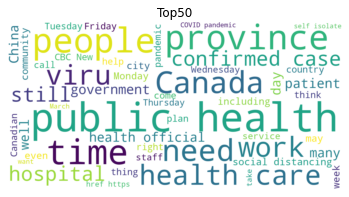

In [17]:
stopwords = set(STOPWORDS)
stopwords.update(["i", "me",'would',"don't", 'U',"my", "myself", "we", "our","A" ,"In","know","ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am",'get','But','per', 'S',"is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so","said",'"','—','also','says','two','I',"it's",'could','The',"Dr","than",'"We',"He",'one',"going", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

wordcloud = WordCloud(max_words=50,width = 1600 , height = 800, stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top50")
plt.show()


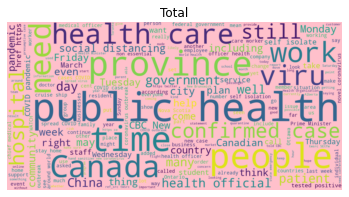

In [18]:
stopwords = set(STOPWORDS)
stopwords.update(["i", "me",'would',"don't", 'U',"my", "myself", "we", "our","A" ,"In","know","ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am",'get','But','per', 'S',"is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so","said",'"','—','also','says','two','I',"it's",'could','The',"Dr","than",'"We',"He",'one',"going", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

wordcloud = WordCloud(width = 1600 , height = 800, stopwords=stopwords, background_color="pink").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Total")
plt.show()